SEMANA 3

Primero importamos las librerías necesarias para realizar el modelo y diferenciamos entre los datos de entrenamiento y los datos de prueba:

In [416]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
data_train = pd.read_csv('baseball_construccion.csv')
data_test = pd.read_csv('baseball_explotacion.csv')

Al igual que hicimos en la práctica 1, lo primero que debmos hacer es limpiarlos datos de entrenamiento. A continuación vamos a ir analizando cada columna por separado:

- Lo primero que vamos a hacer es tratar los valores nulos. Para facilitar el preprocesado de los datos veamos cuantos missing values hay en cada columna

In [417]:
data_train.isnull().sum()

Unnamed: 0            0
year                  0
home_team             0
month                 0
day                   0
attend                0
day_of_week           0
opponent              0
temp                  0
skies                 0
day_night             0
cap                   0
shirt                 0
fireworks             0
bobblehead            0
hum>average         108
attend_inc           30
attend_thousands      0
dtype: int64

- Además también vamnos a comprobar en que columnas hay outliers para poder tratarlos con más detalle más adelante:

In [418]:
#Función para detectar outliers:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))

#Tomamos solo las variables numéricas
data_train2 = data_train.loc[:, data_train.dtypes != object]
is_outlier_IQR(data_train2).any()

Unnamed: 0          False
year                False
day                 False
attend              False
temp                 True
attend_inc           True
attend_thousands    False
dtype: bool

**1. Unnamed**

- Empecemos viendo los valores únicos de esta variable:

In [419]:
data_train['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 2410, 2411, 2412])

- Por el aspecto de estos valores únicos, se puede suponer que esta columna hace referencia a los índices del dataset. Veamos si el tamaño del array coincide con el número de filas del dataset

In [420]:
data_train.shape[0] == len(data_train['Unnamed: 0'].unique())

True

- Esta columna no es relevante para el modelo ya que no nos da ninguna información que nos ayude a predecir los datos deseados, por tanto se puede eliminar

In [421]:
data_train = data_train.drop('Unnamed: 0', axis = 1)

**2. Year**

- Veamos los valores únicos de esta variable

In [422]:
data_train['year'].unique()

array([2012])

- Acabamos de observar que esta columna presenta una valor constante para todas las instancias es inútil a la hora de construir el modelo, por ello es mejor eliminarla

In [423]:
data_train = data_train.drop('year', axis= 1)

**3. Home team**

- Veamos los valores únicos de esta columna:

In [424]:
data_train['home_team'].unique()

array(['Baltimore Orioles', 'Boston Red Sox', 'Chicago White Sox',
       'Cleveland Indians', 'Detroit Tigers', 'Houston Astros',
       'Kansas City Royals', 'Los Angeles Angels', 'Minnesota Twins',
       'New York Yankees', 'Oakland Athletics', 'Seattle Mariners',
       'Tampa Bay Rays', 'Texas Rangers', 'Toronto Blue Jays',
       'Arizona Diamondbacks', 'Atlanta Braves', 'Chicago Cubs',
       'Cincinnati Reds', 'Colorado Rockies', 'Los Angeles Dodgers',
       'Miami Marlins', 'Milwaukee Brewers', 'New York Mets',
       'Philadelphia Phillies', 'Pittsburgh Pirates', 'San Diego Padres',
       'San Francisco Giants', 'St. Louis Cardinals',
       'Washington Nationals'], dtype=object)

- Esta variable hace referencia al equipo local. No tiene valores nulos. Pero como se trata de una variable categórica no ordinal, lo mejor es codificarla con 'one hot'.

In [425]:
data_train = pd.get_dummies(data_train, columns=['home_team'], dtype= int)

**4. Month y Day**

- Veamos las variables únicas de ambas columnas

In [426]:
data_train['month'].unique()

array(['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'], dtype=object)

In [427]:
data_train['day'].unique()

array([ 6,  7,  8,  9, 10, 11, 24, 25, 26, 27, 28, 29, 12, 13, 14, 15, 21,
       22, 23, 30,  1, 16, 17, 18, 20,  2,  4,  5, 31, 19,  3])

- En este caso se nos presenta un problema con componentes estacionales, ya que a la hora de predecir la afluencia de público en un partido de béisbol es importante saber en que época del año se celebró. En cambio el día exacto del partido no es tan relevante para el modelo y puede entorpecer la realización de este, por tanto esa columna es mejor eliminarla. Los meses vamos a tratarlas como variables categóricas sin orden y a codificarlas.

In [428]:
data_train = data_train.drop('day', axis= 1) #Eliminamos el día

In [429]:
data_train = pd.get_dummies(data_train, columns=['month'], dtype= int)
#Añadimos la columna de octubre presente en data_test para que no de errores porsteriormente
data_train['month_OCT'] = 0

**5. Attend**

- Valores únicos:

In [430]:
data_train['attend'].unique()

array([32741, 22072, 10317, ..., 19973, 20202, 17077])

En esta columna no hay valores nulos y la variable es de tipo numérico. Antes de seguir vamos a comprobar que no tienen una distribución de cola pesada

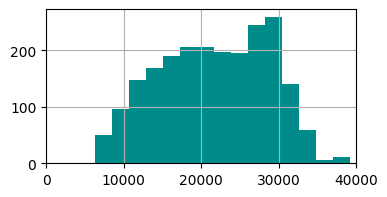

In [431]:
data_train["attend"].hist(bins=15, figsize=(4,2), color= 'darkcyan') # 4 ancho, 2 alto
plt.xlim(0,40000);

- Gracias al histograma vemos que que la variable no sigue una distribución de cola pesada y por tanto no hay que hacer una transformación logarítmica

**6. Day of week**

- Valores únicos de la columna:

In [432]:
data_train['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

- Volvemos a estar ante un componente estacional sin valores nulos, por tanto vamos a tratar los días de la semana como variables categóricas no ordenadas y a dicotomizarlas

In [433]:
data_train = pd.get_dummies(data_train, columns=['day_of_week'], dtype= int)

**7. Opponent**

- Valores únicos:

In [434]:
data_train['opponent'].unique()

array(['Minnesota Twins', 'New York Yankees', 'Toronto Blue Jays',
       'Oakland Athletics', 'Texas Rangers', 'Tampa Bay Rays',
       'Boston Red Sox', 'Kansas City Royals', 'Philadelphia Phillies',
       'Pittsburgh Pirates', 'Washington Nationals', 'Los Angeles Angels',
       'Cleveland Indians', 'Detroit Tigers', 'Seattle Mariners',
       'Chicago White Sox', 'Baltimore Orioles', 'Miami Marlins',
       'Atlanta Braves', 'Houston Astros', 'Chicago Cubs',
       'Milwaukee Brewers', 'Cincinnati Reds', 'Colorado Rockies',
       'St. Louis Cardinals', 'Los Angeles Dodgers', 'New York Mets',
       'San Diego Padres', 'Arizona Diamondbacks', 'San Francisco Giants'],
      dtype=object)

- Se trata de los equipos rivales del equipo local. Por tanto vamos a seguir el mismo procedimiento en esta columna

In [435]:
data_train = pd.get_dummies(data_train, columns=['opponent'], dtype= int)

**8. Temp**

- Valores únicos:

In [436]:
data_train['temp'].unique()

array([ 59,  63,  68,  65,  62,  53,  60,  70,  64,  56,  67,  61,  71,
        77,  79,  66,  78,  72,  76,  75,  82,  87,  86,  81,  90,  88,
        85,  92, 100,  91,  95,  84,  73,  80,  83,  74,  58,  51,  52,
        46,  47,  54,  57,  69,  55,  96,  89,  50,  39,  93,  97,  99,
        44,  48,  45,   6,  43,  42,  94,  98, 103,  49, 104, 102, 105,
       101,  40, 106])

- En esta variable númerica no había valores nulos pero sí que había outliers. Vamos a ver cuántos hay y que impacto pueden tener en el modelo antes

In [437]:
outliermss1 = data_train['temp'][is_outlier_IQR(data_train['temp'])]
outliermss1

151      39
152      39
217      44
221      45
222       6
226      43
290      43
293      42
297      43
581      45
1240     40
1241     44
1243     42
1244     43
1245     45
1246     44
1823     45
1824     44
2078    106
Name: temp, dtype: int64

In [438]:
print(f'Número de outliers en un dataset de tamaño {data_train.shape[0]} es : {len(outliermss1)}')

Número de outliers en un dataset de tamaño 2181 es : 19


- Hay mu pocos outliers, pero una de las formas de tratar con ellos es sustituirlos por la media, pero como tenemos el dato de 106 (que seguramente sea un error de medición) la media nos sale 74 grados, lo cual no tiene sentido. Por tanto creemos que lo mejor es eliminarlo.

In [439]:
data_train = data_train.drop([151,152,217,221,222,226,290,293,297,581,1240,1241,1243,1244,1245,1246,1823,1824,2078])

**9. Skies**

- Valores únicos:

In [440]:
data_train['skies'].unique()

array(['Clear', 'Cloudy', 'Rainy', 'Dome'], dtype=object)

- Representa como estaba el cielo el día del partido. Creemos que es importante matener la columna ya que la temperatura no es capaz de determinar si llueve o no con precisión, y las condiciones metereológicas pueden ser de ayuda a la hora de predecir la afluencia de gente en el partido. Como es una variable categórica no ordenada, la codificamos usando 'one hot':

In [441]:
data_train3 = pd.get_dummies(data_train['skies'], dtype= int)
data_train3[data_train3.iloc[:] == 1].sum() 

Clear      691.0
Cloudy    1153.0
Dome       300.0
Rainy       18.0
dtype: float64

In [442]:
data_train = pd.get_dummies(data_train, columns=['skies'], dtype= int)

**10. Day-Night**

- Veamos el número de veces que es de día o de noche:

In [443]:
data_train_ = pd.get_dummies(data_train['day_night'], dtype= int)
data_train_[data_train_.iloc[:] == 1].sum() 

Day       700.0
Night    1462.0
dtype: float64

- No creemos que sea necesario eliminarla ya que no hay suficientes pocos valores de Day como para que Night sea un atributo constante, además de que saber cuando ocurrió el partido es relevante a la hora de predecir el modelo. Al ser una variable categórica no ordenada hay que codificarla, pero podemos prescindir de un valor.

In [444]:
data_train = pd.get_dummies(data_train, columns=['day_night'],drop_first=True, dtype= int)

**11. Cap**

- Hace referencia a una promoción gorras. Veamos los valores únicos y cuántas veces aparecen:

In [445]:
data_train['cap'].unique()

array(['NO', 'YES'], dtype=object)

In [446]:
data_train_2 = pd.get_dummies(data_train['cap'], dtype= int)
data_train_2[data_train_2.iloc[:] == 1].sum() 

NO     2080.0
YES      82.0
dtype: float64

- Usamos 'one hot':

In [447]:
data_train = pd.get_dummies(data_train, columns=['cap'], dtype= int) 
data_train = data_train.drop('cap_YES', axis= 1) #Quitamos esta columna ya que no está en data_test y es como si hiciéramos 'drop_first' = True
#pero dejando sólo la columna de 'cap_NO'

**12. Shirt**

- Procedemos igual que con Cap, viendo cuántes veces aparece cada valor único en la columna:

In [448]:
data_train_3 = pd.get_dummies(data_train['shirt'], dtype= int)
data_train_3[data_train_3.iloc[:] == 1].sum() 

NO     2056.0
YES     106.0
dtype: float64

- Decidimos mantenerla y codificarla

In [449]:
data_train = pd.get_dummies(data_train, columns=['shirt'],drop_first=True, dtype= int)

**13. Fireworks**

- Representa si ese día hubo fuegos artificiales. Hacemos lo mismo que con Cap y Shirt:

In [450]:
data_train_ = pd.get_dummies(data_train['fireworks'], dtype= int)
data_train_[data_train_.iloc[:] == 1].sum() 

NO     1990.0
YES     172.0
dtype: float64

In [451]:
data_train = pd.get_dummies(data_train, columns=['fireworks'],drop_first=True, dtype= int)

**14. Bobblehead**

- Hace referencia a si ese día regalaban a la entrada muñequitos de los jugadores. Hacemos lo mismo que en las tres anteriores, vemos la diferencia entre el número de valores para ver si consideramos a uno de los atributos constante y si debemos eliminar la columna:

In [452]:
data_train_ = pd.get_dummies(data_train['bobblehead'], dtype= int)
data_train_[data_train_.iloc[:] == 1].sum() 

NO     2073.0
YES      89.0
dtype: float64

- Decidimos mantenerla:

In [453]:
data_train = pd.get_dummies(data_train, columns=['bobblehead'],drop_first=True, dtype= int)

**15. Hum>average**

- Representa si la humedad está por encima de la media. Veamos los valores únicos:

In [454]:
data_train['hum>average'].unique()

array(['NO', 'YES', nan], dtype=object)

- Esta variable categórica no ordenada tiene missing values. No creemos que sea muy importante para el modelo, por eso creemos que es mejor eliminarla, además de que en el dataset de prueba también hay missing values en esta columna

In [455]:
data_train = data_train.drop('hum>average', axis= 1)

**16. Attend_inc**

- Se refiere al incremento de espectadores respecto al último partido del equipo local en ese estadio. Se trata de una variable numérica que tenía tanto outliers como missing values. Nuestra varible target es 'attend', por tanto no sabemos si está variable nos será de utilidad para nuestro modelo. Veamos la correlación que tiene con 'attend':

In [456]:
data_train['attend'].corr(data_train['attend_inc'])

0.3244710484481578

- Commo se puede observar, la correlación con el taget es bastante baja, por tanto estamos delante de un falso predictor, ya que a pesar de mostrar una aparente correlación con la variable de interés 'attend', no tiene una relación causal real o una capacidad predictiva sustancial. Por tanto, la eliminamos:

In [457]:
data_train = data_train.drop('attend_inc', axis= 1)

**17. Attend thousands**

- Indica el número de espectadores en millares. Veamos los valores únicos:

In [458]:
data_train['attend_thousands'].unique()

array([33, 22, 10, 18, 17, 16,  8,  7, 13, 19, 23, 21, 12, 11, 20, 24, 28,
       32, 29, 25, 30, 14, 15,  9, 26, 27,  6, 31, 35, 34, 39, 38, 36, 37])

- Como ya tenemos la columna de *attend* que indica el número de personas exacto que acudió al evento, esta columna nos parece repetitiva, por eso creemos que es mejor eliminarla:

In [459]:
data_train = data_train.drop('attend_thousands', axis = 1)

Una vez hemos limpiado los datos, empezamos siguiendo los pasos de la SEMANA 1 de esta práctica

1. Eliminación de las variables colineales

- A continuación reduciremos el datset a un conjunto de variables independientes:

In [460]:
len(data_train.columns) #Nº columnas

85

In [461]:
np.linalg.matrix_rank(data_train.cov()) #Rango

79

In [462]:
data_train2 = data_train #Copia del dataset auxiliar
cols = data_train.columns #columnas del dataset
rank1 = np.linalg.matrix_rank(data_train.cov())

for col in cols:
    cols2 = cols.drop(col) #Eliminamos una columna para ver si cambia el rango
    data_train2 = data_train2[cols2] #Cogemos el dataset sin esa columna
    rank2 = np.linalg.matrix_rank(data_train2.cov()) #Hallamos el rango de ese datset
    if rank1 == rank2: #Si los rangos siguen igual, se elimina esa columna porque es linealmente dependiente
        cols = cols2
    else:
        data_train2 = data_train #si son distintos, esa columna es linealmente independiente y no se quita


data_train = data_train[cols]

In [463]:
len(data_train.columns)

79

In [464]:
np.linalg.matrix_rank(data_train.cov())

79

2. Construimos el modelo de regresión lineal y calculamos el coeficiente de determinación R2

- Primero, data_test debe tener las mismas columnas que data_train, por eso las modificamos:

In [465]:
#CODIFICAMOS LAS VARIABLES NUMÉRICAS EN TEST
data_test = pd.get_dummies(data_test, columns=['home_team'], dtype= int)
data_test = pd.get_dummies(data_test, columns=['month'], dtype= int)
#Añadimos las columnas que faltan de los meses
data_test['month_APR'] = 0
data_test['month_AUG'] = 0
data_test['month_JUL'] = 0
data_test['month_JUN'] = 0
data_test['month_MAY'] = 0
data_test = pd.get_dummies(data_test, columns=['day_of_week'], dtype= int)
data_test = pd.get_dummies(data_test, columns=['opponent'], dtype= int)
data_test = pd.get_dummies(data_test, columns=['skies'], dtype= int)
data_test = pd.get_dummies(data_test, columns=['day_night'],drop_first=True, dtype= int)
data_test = pd.get_dummies(data_test, columns=['cap'], dtype= int)
data_test = pd.get_dummies(data_test, columns=['shirt'],drop_first=True, dtype= int)
data_test= pd.get_dummies(data_test, columns=['fireworks'],drop_first=True, dtype= int)
data_test = pd.get_dummies(data_test, columns=['bobblehead'],drop_first=True, dtype= int)
#data_test = data_test.fillna({'attend': data_train['attend']})

In [466]:
data_test = data_test[cols] #Tomamos las columnas de data_train

- Definimos el modelo de regresión:

In [467]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [468]:
x_train = data_train.drop('attend', axis=1)
y_train = data_train['attend']
x_test  = data_test.drop("attend", axis=1)

In [469]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

- Coeficientes de determinación R2:

In [470]:
model.score(x_train, y_train)

0.7607628677872806

CREACIÓN DEL FICHERO CON LAS PREDICCIONES

- Definimos los datos de las predicciones:

In [471]:
predicciones_target = list(model.predict(x_test))

- Sustituimos los valores en el fichero de 'predicciones.csv':

In [472]:
predicciones_df = pd.read_csv('predicciones.csv') #Abrimos el fichero
predicciones_df['attend'] = predicciones_target #Cambiamos los valores
predicciones_df.to_csv('predicciones.csv', index=False) #Volvemos a pasarlo a csv

In [475]:
list(model.predict(x_train))

[18053.752902087203,
 18599.982406756768,
 17684.52054380218,
 19536.86461391917,
 19455.120084849725,
 19484.120731051895,
 13463.433822111301,
 13563.583847553346,
 15663.700432926387,
 16617.97472972444,
 18130.766216936518,
 17284.39996756858,
 14986.186256702633,
 14961.72884159278,
 17056.55777362926,
 16346.857194462147,
 18006.667365571473,
 18294.975188375276,
 18671.500073045907,
 20025.345636059697,
 16982.42817753229,
 16978.60671877344,
 18102.91493313422,
 19203.303912927655,
 19259.11646740294,
 19209.928213426025,
 20879.993080237207,
 23602.975455943706,
 21580.811578666362,
 16109.804121211619,
 16168.68223395165,
 17577.515952093243,
 20363.972584909847,
 23976.227384014885,
 21085.427039690006,
 18512.9992084863,
 17397.88014095952,
 18225.501685751657,
 21520.133745545783,
 21479.645170383043,
 19083.29254454131,
 22566.066443875297,
 23254.165327228344,
 22465.54364120097,
 14976.629695671014,
 16225.520189935432,
 18205.675250498265,
 22404.324807615274,
 20101.5

- Comprobemos la eficiencia del modelo usando el error relativo medio

In [492]:
sumatorio = sum(abs(model.predict(x_train)-y_train)) #Suma de la diferencia entre la estimación y los valores reales
sumatorio2 = sum(y_train) #Suma de los valores reales
n = predicciones_df.shape[0] #Tamaño de los datos
error = 100*(1/n)*(sumatorio/sumatorio2) #Calculo del error
print(f'El error relativo medio es de {error}%')

El error relativo medio es de 0.05011541471820052%
